In [217]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import tensorwatch as tw

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [218]:
global_data = pd.read_csv('./data/global_data.csv')
global_data.drop('Unnamed: 0', axis=1, inplace=True)
global_data

,dt,mean_temp
0,1900,20.571300
1,1901,21.928121
2,1902,21.360850
3,1903,21.650719
4,1904,21.196928
5,1905,21.524476
6,1906,21.043352
7,1907,20.749390
8,1908,21.321244
9,1909,20.987178


In [219]:
signal_size = 10
gap = 1

In [220]:
data = []
labels = []
start = 0
end = signal_size
raw_data = global_data['mean_temp'].to_numpy()
while end < global_data.shape[0]:
    data.append(raw_data[start:end])
    labels.append(global_data['mean_temp'][end])

    start += gap
    end += gap

In [221]:
scalar = MinMaxScaler()

In [222]:
data_scaled = scalar.fit_transform(data)

In [223]:
X_train = data_scaled[:int(0.7*len(data_scaled)), :]
Y_train = labels[:int(0.7*len(data_scaled))]
X_test = data_scaled[int(0.7*len(data_scaled)):, :]
Y_test = labels[int(0.7*len(data_scaled)):]

In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled, labels, test_size=0.3, random_state=42, shuffle=True)

In [225]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [226]:
NUM_EPOCHS = 20
INPUT_SIZE = signal_size
learning_rate = 0.01
batch_size = 10

In [227]:
Train_data = TensorDataset(torch.tensor(X_train), torch.tensor(Y_train))
Test_data = TensorDataset(torch.tensor(X_test), torch.tensor(Y_test))

trainloader = torch.utils.data.DataLoader(Train_data, batch_size=batch_size, shuffle=True, drop_last=True)
testloader = torch.utils.data.DataLoader(Test_data, batch_size=1, shuffle=None, drop_last=True)

In [228]:
class BP_network(nn.Module):
    def __init__(self, inputsize) -> None:
        super(BP_network, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(inputsize, 100, bias=False), 
            nn.BatchNorm1d(100), 
            nn.LeakyReLU(0.5, inplace=True)
            # nn.ReLU(inplace=True)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(100, 20, bias=False), 
            nn.BatchNorm1d(20), 
            nn.LeakyReLU(0.5, inplace=True),
            # nn.ReLU(inplace=True)
        )
        
        self.fc5 = nn.Linear(20, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        #x = self.fc3(x)
        #x = self.fc4(x)
        out = self.fc5(x)

        return out
            


In [229]:
BP = BP_network(INPUT_SIZE).double()

In [230]:
optimizer = torch.optim.Adam(BP.parameters(), lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = NUM_EPOCHS, gamma=0.1)
criterion = torch.nn.MSELoss()
# criterion = torch.nn.L1Loss()

In [231]:
BP.train()
Loss_epoch = []
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    batch_count = 0
    for step, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = BP(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        # scheduler.step()
        epoch_loss += loss.item()
        batch_count += 1
    Loss_epoch.append(epoch_loss/batch_count)
    print("Epoch {}, Epoch loss: {}".format(
            epoch, epoch_loss))


d:\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Epoch loss: 2745.1191197237786
Epoch 1, Epoch loss: 2594.76275755512
Epoch 2, Epoch loss: 2431.1385519371397
Epoch 3, Epoch loss: 2227.1465412841476
Epoch 4, Epoch loss: 1973.399449945996
Epoch 5, Epoch loss: 1681.9618878148945
Epoch 6, Epoch loss: 1361.7415312425198
Epoch 7, Epoch loss: 1017.8134699507868
Epoch 8, Epoch loss: 692.9777840340003
Epoch 9, Epoch loss: 411.703129150625
Epoch 10, Epoch loss: 203.57632800865002
Epoch 11, Epoch loss: 74.82907570790742
Epoch 12, Epoch loss: 23.429920385249666
Epoch 13, Epoch loss: 10.834678646298055
Epoch 14, Epoch loss: 15.21641026224861
Epoch 15, Epoch loss: 20.573106885772702
Epoch 16, Epoch loss: 16.182787499033374
Epoch 17, Epoch loss: 18.278796849639956
Epoch 18, Epoch loss: 8.463087900357662
Epoch 19, Epoch loss: 11.505778925755276


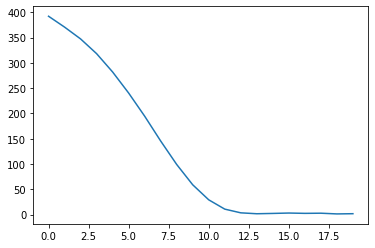

In [232]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(Loss_epoch)), Loss_epoch)

In [233]:
import os
from datetime import datetime

In [234]:
sub_dir = 'BP'+ datetime.strftime(datetime.now(), '%m%d-%H%M%S')
save_dir = './network'

In [235]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

torch.save(BP.state_dict(), save_dir+'./'+sub_dir+'.pt')

In [236]:
BP.eval()
eval_loss = []
real = []
predicted = []
for step, (x, y) in enumerate(testloader):
    real.append(y.item())
    outputs = BP(x)
    predicted.append(outputs.item())
    loss = criterion(outputs, y)
    eval_loss.append(loss.item())
    print("Step {}, Step loss: {}".format(
            step, loss.item()))

predicted = np.array(predicted)
real = np.array(real)

Step 0, Step loss: 0.03596345516655334
Step 1, Step loss: 1.1490919633043406
Step 2, Step loss: 1.8636607647772965
Step 3, Step loss: 0.3340495527052102
Step 4, Step loss: 0.2485801529624776
Step 5, Step loss: 2.400908812014728
Step 6, Step loss: 4.298386199435896
Step 7, Step loss: 1.5926935236462716
Step 8, Step loss: 0.06732805405436004
Step 9, Step loss: 0.47916073865487463
Step 10, Step loss: 0.0029894080170932563
Step 11, Step loss: 0.056280562070830514
Step 12, Step loss: 4.928899401897772
Step 13, Step loss: 2.8312198438043814
Step 14, Step loss: 3.9777687837196796
Step 15, Step loss: 0.03446701060675923
Step 16, Step loss: 2.473490448433249
Step 17, Step loss: 0.13728634805368986
Step 18, Step loss: 0.1584442566397787
Step 19, Step loss: 0.0412282038285571
Step 20, Step loss: 0.5400633623783242
Step 21, Step loss: 3.4930470619453047
Step 22, Step loss: 0.10981763367167212
Step 23, Step loss: 1.7465729248112825
Step 24, Step loss: 0.19588341434443415
Step 25, Step loss: 3.14364

d:\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


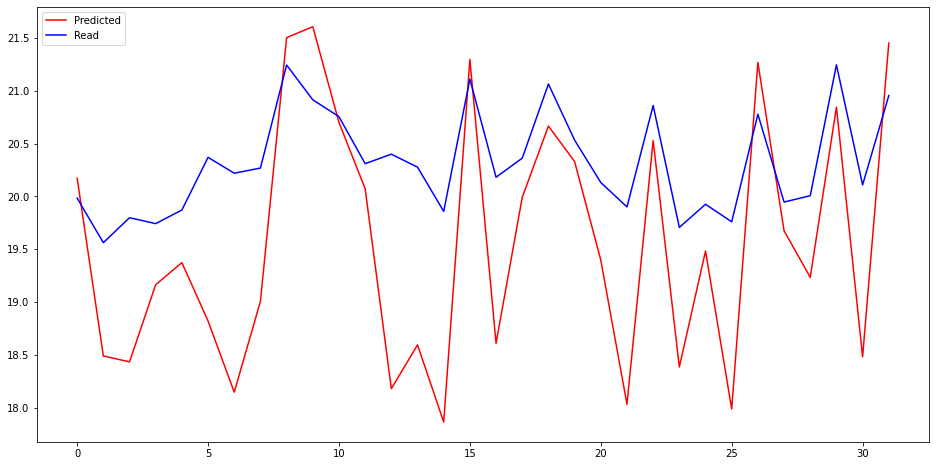

In [244]:
x = np.arange(len(predicted))
plt.figure(figsize=(16, 8))
plt.plot(x, predicted, color='r', label="Predicted")
plt.plot(x, real, color='b', label='Read')
plt.legend()
plt.show()

In [238]:
def BP_predict(start_years, yearsize, n, Net):
    """
    start_years: 起始的几个年
    yearsize: 起始年份的长度
    n: 要预测后面n年
    Net: 训练好的网络

    return 预测的结果
    """
    res = start_years
    start = 0
    end = yearsize
    for i in range(n):
        future = np.array(res).reshape(-1, 1)
        future = scalar.fit_transform(future)
        pre = Net(torch.tensor(future[start:end]).reshape(1, -1).double()).reshape(1, -1)
        res.append(pre.item())
        start += 1
        end += 1
    return np.array(res)

In [239]:
result = []
inputs = global_data['mean_temp'][:signal_size].to_list()
result = BP_predict(inputs, signal_size, len(global_data)-signal_size+100, BP)

In [240]:
global_data['mean_temp'].shape[0]

114

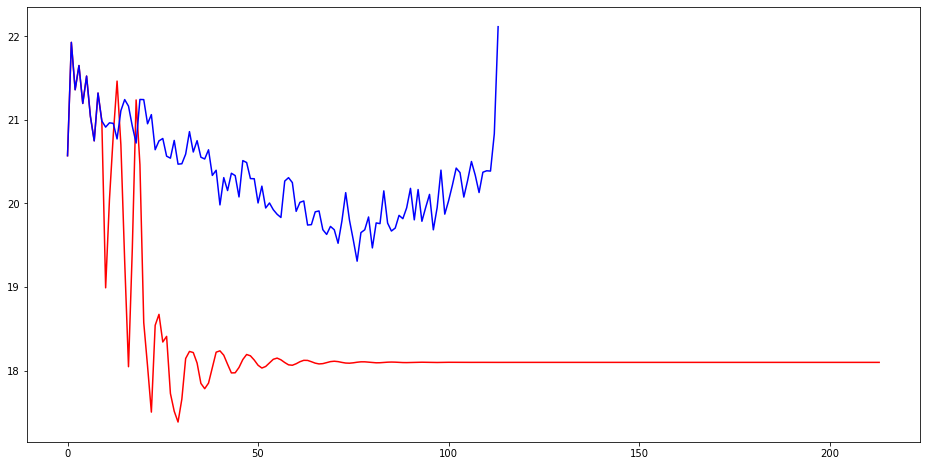

In [241]:
x = np.arange(len(inputs))
plt.figure(figsize=(16, 8))
plt.plot(x, result, color='r')
plt.plot(np.arange(global_data['mean_temp'].shape[0]), global_data['mean_temp'], color='b')
plt.show()

In [242]:
model = torch.load('./network/FinalBP1126-162315.pt')

In [243]:
BP = BP_network(INPUT_SIZE).double()
BP.load_state_dict(model)
BP.eval()

RuntimeError: Error(s) in loading state_dict for BP_network:
	Unexpected key(s) in state_dict: "fc3.0.weight", "fc3.1.weight", "fc3.1.bias", "fc3.1.running_mean", "fc3.1.running_var", "fc3.1.num_batches_tracked", "fc4.0.weight", "fc4.1.weight", "fc4.1.bias", "fc4.1.running_mean", "fc4.1.running_var", "fc4.1.num_batches_tracked". 
	size mismatch for fc1.0.weight: copying a param with shape torch.Size([100, 5]) from checkpoint, the shape in current model is torch.Size([100, 10]).
	size mismatch for fc2.0.weight: copying a param with shape torch.Size([50, 100]) from checkpoint, the shape in current model is torch.Size([20, 100]).
	size mismatch for fc2.1.weight: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([20]).
	size mismatch for fc2.1.bias: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([20]).
	size mismatch for fc2.1.running_mean: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([20]).
	size mismatch for fc2.1.running_var: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([20]).
	size mismatch for fc5.weight: copying a param with shape torch.Size([1, 10]) from checkpoint, the shape in current model is torch.Size([1, 20]).

In [ ]:
model_clone = BP
with torch.onnx.select_model_mode_for_export(model_clone, torch.onnx.TrainingMode.EVAL):
    net_watch = tw.draw_model(model_clone)